# **Task 6 : Email Spam Filtering**
# Use a dataset of emails and build a model that
# can identify spam emails.

# Email Spam Filtering

## Introduction to Email Spam Filtering

- Email spam refers to unsolicited and often irrelevant or harmful emails sent in bulk to a large number of recipients.
- Email spam filtering is the process of identifying and separating spam emails from legitimate ones.

## Importance of Email Spam Filtering

- Email spam can overwhelm inboxes, making it difficult for users to find genuine emails.
- Spam emails may contain malware, phishing links, or fraudulent content, posing security risks.

## Common Techniques for Email Spam Filtering

### Rule-Based Filtering

- Involves setting up predefined rules or filters to detect spam based on specific criteria (e.g., keywords, sender, subject).
- Simple and effective for known patterns but can miss new spam variants.

### Bayesian Filtering

- Uses Bayesian probability to analyze the probability of an email being spam based on word occurrences.
- Requires initial training with a dataset of known spam and non-spam emails.

### Content-Based Filtering

- Analyzes the email content, looking for spammy keywords, phrases, or patterns.
- Effective but may lead to false positives or false negatives.

### Header Analysis

- Inspects email headers for anomalies, such as mismatched sender domains or suspicious routing.
- Detects spoofed email addresses and header manipulations.

### Blacklists and Whitelists

- Blacklists contain known spam sources, while whitelists include trusted senders.
- Emails from blacklisted sources are filtered out, while whitelisted sources are trusted.

### Machine Learning-Based Filtering

- Utilizes supervised machine learning algorithms to classify emails as spam or not based on various features.
- Requires labeled training data for model training and can adapt to new spam patterns.

## Challenges in Email Spam Filtering

- Evolving Spam Techniques: Spammers continuously adapt to bypass filters.
- False Positives: Aggressive filtering can mistakenly mark legitimate emails as spam.
- False Negatives: Some spam emails can still evade filters.
- Resource Intensiveness: Machine learning-based filtering may require substantial computational resources.

## Improving Email Spam Filtering

- Regular Updates: Keep spam filters updated to adapt to new spamming techniques.
- User Feedback: Allow users to report spam and false positives/negatives to improve filter accuracy.
- Combining Techniques: Combining multiple filtering techniques can enhance accuracy.

## Business and User Benefits

- Reduced Inbox Clutter: Users receive only relevant emails, improving productivity.
- Enhanced Security: Protection against malicious content and phishing attempts.
- Improved Reputation: Businesses can maintain a positive email sender reputation.

## Conclusion

- Email spam filtering is essential for maintaining the efficiency and security of email communication.
- Employing a combination of filtering techniques and regular updates can help in effectively combating email spam.


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [ ]:
# Displaying the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('v1')):
  _plot_series(series, series_name, i)
  fig.legend(title='v1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('v2')):
  _plot_series(series, series_name, i)
  fig.legend(title='v2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_6.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['v1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='v1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['v2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='v2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Droping unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# **Exploring the Dataset**

In [ ]:
# Displaying the data
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Consice information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_11.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

In [ ]:
new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_14.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

# **Data Visualisation**

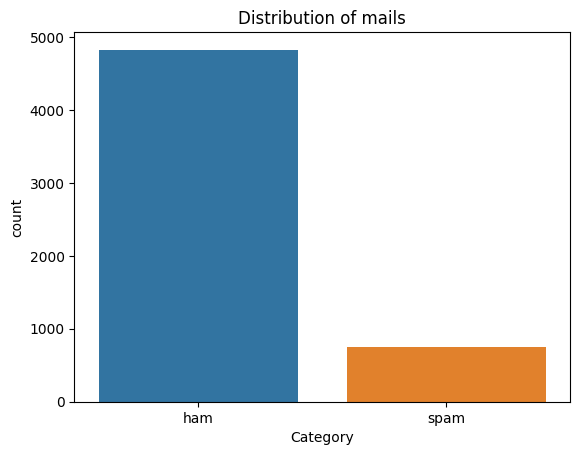

In [ ]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

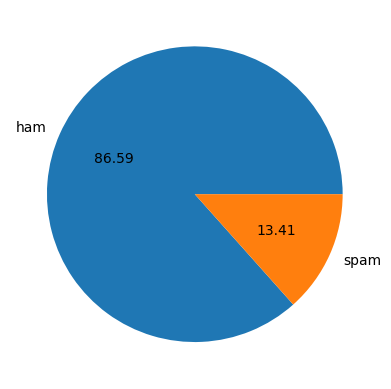

In [ ]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# **Data Preprocessing**
### **Label Encoding**

In [ ]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1
# Separate the feature (message) and target (category) data
X = df["Message"]
Y = df["Category"]
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# **Splitting the data into training data and test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
# Print the shape of X
print(X.shape)

# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)


(5572,)
(4457,)
(1115,)


# **Feature Extraction**
**TF-IDF Vectorizer**

In [ ]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

# **Model Selection and Training**
**Logistic Regresion**

In [ ]:
# Creating and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

# **Evaluating the trained model**

In [ ]:
#Make predictions on the training data
predict_train_data=model.predict(X_train_features)
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9661207089970832


In [ ]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9623318385650225


# **Test the model with an email messages**

In [ ]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


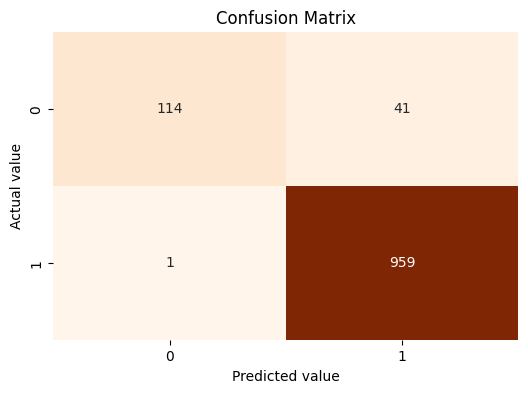

In [ ]:
#Confusion Matrix
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

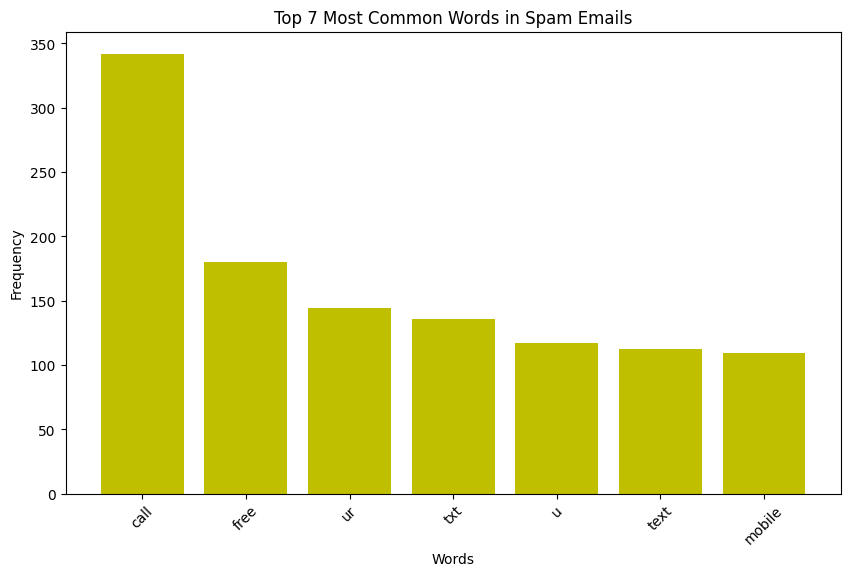

In [ ]:
# Data visualization - Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()
